# Laboratorio 2
### Entrega: jueves 6 de octubre, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [133]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*(1-p) = p\\
E[X^2] & = & 1*p + 0*(1-p) = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


In [134]:
# k veces que sale cara
# n ensayos
# p exitoso
## aumentar el size para que se parezca mas


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

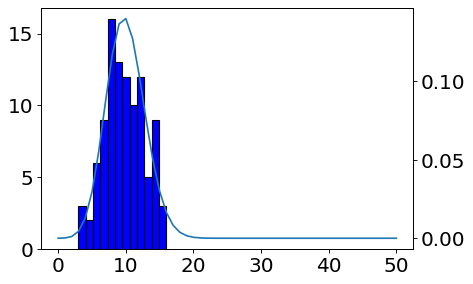

In [135]:
## simulación de size valores v.a. binomial
size=100
n=50
p=0.2
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


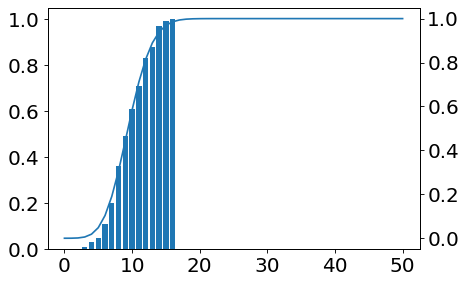

In [136]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [137]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 9.76  teórica:  10.0
varianza empírica: 7.522399999999999  teórica:  8.0
asimetría empírica: 0.01599249157231137 teórica:  0.21213203435596423
curtosis empírico:  -0.5249628380632374 teórico:  0.004999999999999977


#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

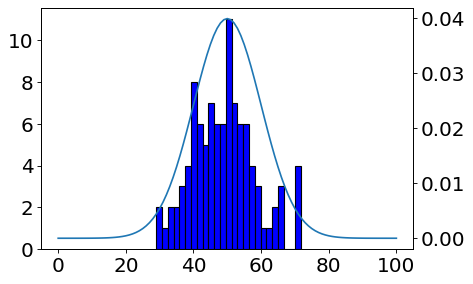

In [138]:
## simulación de size valores v.a. normal
size=100
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


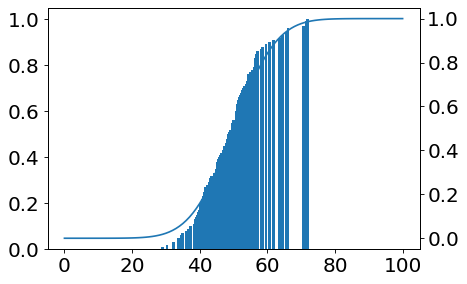

In [139]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [140]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 48.89303005002711  teórica:  50
varianza empírica: 87.21285110660716  teórica:  100
asimetría empírica: 0.3584619309862542 teórica:  0
curtosis empírico:  -0.07801530168702797 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída t-student de $k$ grados de libertad

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

In [141]:
# Atacama -26.018495, -70.534418 > -29.431190, -69.974115
# Coquimbo -29.279461, -71.483410 > -32.110428, -70.252825
import pandas as pd


In [142]:
# Crear dataframe de dataSismosAtacama.csv y mostrarlo
dfAtacama = pd.read_csv('dataSismosAtacama.csv')
size = len(dfAtacama)
p = np.ones_like(dfAtacama['Magnitud [*]']) / len(dfAtacama['Magnitud [*]'])
print(size,p[0])

dfAtacama.head()

51 0.0196078431372549


,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2021-06-27 21:50:55,-27.26,-70.28,89,3.6
1,2022-01-13 23:24:10,-27.48,-70.43,80,4.0
2,2021-06-11 12:21:13,-28.18,-70.33,105,3.9
3,2019-12-20 08:31:55,-26.39,-70.44,54,4.0
4,2021-05-23 13:23:11,-28.70,-70.38,92,4.1


In [143]:
# Funcion generica que grafica histograma  para un dataFrame que contenga 'Profundiad [km]' y 'Magnitud [*]'
## Recibe el dataframe con los datos y un nombre para el grafico
def plotHistSismos(dataFrame, name):
    fig, ax = plt.subplots(1, 2,figsize=(14, 6), dpi=80)
    weights_Magnitud = np.ones_like(dataFrame['Magnitud [*]']) / len(dataFrame['Magnitud [*]'])
    ax[0].hist(dataFrame['Magnitud [*]'], color = 'blue', edgecolor = 'black', bins = 20)

    #Titulo e Informacion
    ax[0].set_title(f'Histograma de Magnitud [*] {name}', fontsize=20)
    ax[0].set_xlabel('Magnitud [*]')
    ax[0].set_ylabel('Frecuencia')


    weights_Profundidad = np.ones_like(dataFrame['Profundidad [km]']) / len(dataFrame['Profundidad [km]'])
    ax[1].hist(dataFrame['Profundidad [km]'], color = 'blue', edgecolor = 'black', bins = 20)

    #Titulo e Informacion
    ax[1].set_title(f'Histograma de Profundidad [km] {name}', fontsize=20)
    ax[1].set_xlabel('Profundidad [km]')
    ax[1].set_ylabel('Frecuencia')
    plt.draw()

## Cálculo de esperanza y varianza empírica y teórica
# promedio = sum(datos_norm)/size
# var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
# asim = stats.skew(datos_norm)
# curtos = stats.kurtosis(datos_norm)

def infoEmpiricosSismos(dataFrame, col):
    promedio = dataFrame[col].mean();
    varianza = ( (dataFrame[col]-promedio)**2).mean()
    asim = stats.skew(dataFrame[col])
    curtos = stats.kurtosis(dataFrame[col])
    print(promedio, varianza, asim, curtos)

4.288235294117648 0.39476355247981554 1.0750292595592326 0.6502672336539579
87.76470588235294 310.1407151095732 -1.3002116044130894 2.0150221514333495


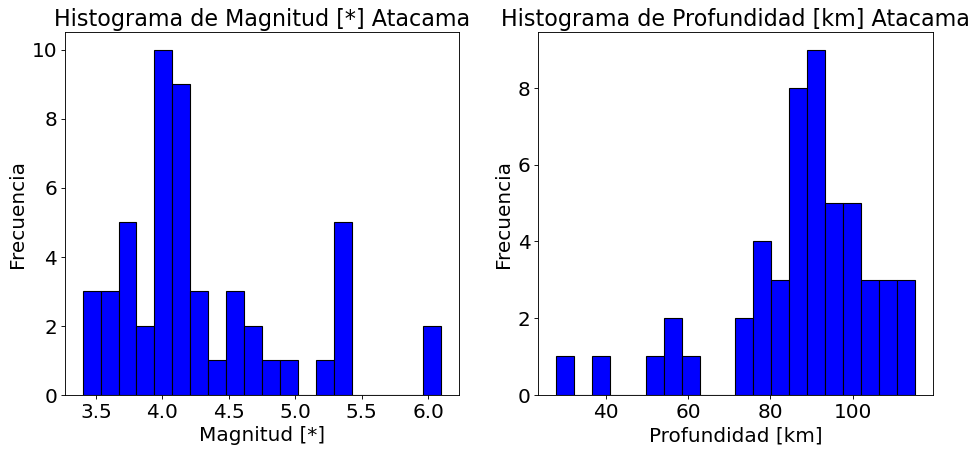

In [144]:
plotHistSismos(dfAtacama, 'Atacama')
infoEmpiricosSismos(dfAtacama, 'Magnitud [*]')
infoEmpiricosSismos(dfAtacama, 'Profundidad [km]')

In [145]:
dfCoquimbo = pd.read_csv('dataSismosCoquimbo.csv')
dfCoquimbo.head()

,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2019-09-21 17:22:44,-29.62,-71.26,58,3.5
1,2019-01-20 02:46:57,-30.14,-71.27,63,3.4
2,2019-02-05 20:00:06,-30.25,-71.25,70,3.9
3,2021-12-11 20:07:55,-29.59,-71.27,54,3.7
4,2021-07-02 06:31:43,-29.84,-71.20,53,3.4


4.31522556390977 0.33489976115099757 0.7534097625047433 1.4265102203236326
54.75375939849624 235.98259864887854 1.531466311831665 5.811106265372688


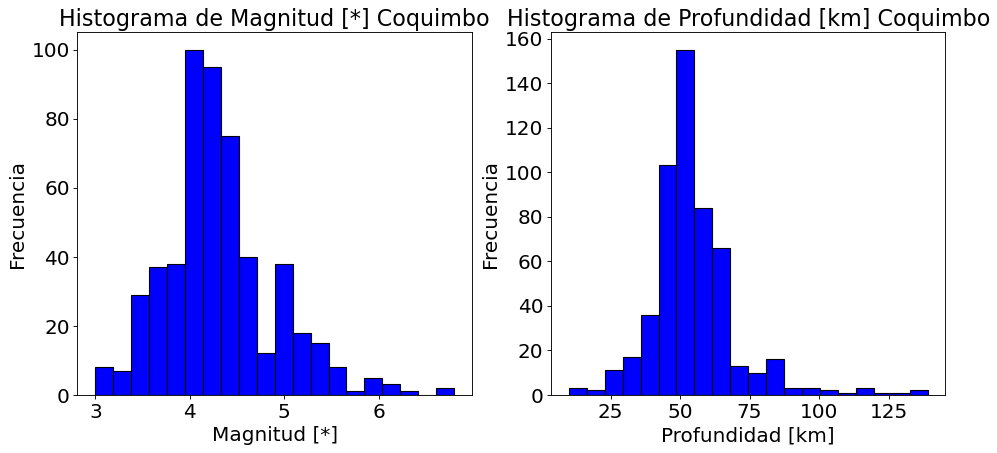

In [146]:
plotHistSismos(dfCoquimbo,'Coquimbo')
infoEmpiricosSismos(dfCoquimbo, 'Magnitud [*]')
infoEmpiricosSismos(dfCoquimbo, 'Profundidad [km]')


### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
